# Recurrent Neural Networks for Time Series using Python 

# 1- Overview of RNN Models 


# 2- Important Parameters in Time Series Forecasting

# 3-  LSTM in Python

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Bidirectional, BatchNormalization, Embedding, GRU, SimpleRNN

In [4]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(LSTM(128))

model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164106 (641.04 KB)
Trainable params: 164106 (641.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4- Bidirectional LSTM in Python

In [5]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(5,10)))

model.add(Bidirectional(LSTM(128)))

model.add(Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirection  (None, None, 256)         197632    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 658442 (2.51 MB)
Trainable params: 658442 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5- Gated Recurrent Unit (GRU) in Python


In [8]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(GRU(128, return_sequences=True))

model.add(SimpleRNN(128))

model.add(Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 128)         74496     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 172,682
Trainable params: 172,682
Non-trainable params: 0
_________________________________________________________________


# 6- Underfitting and Overfitting

In [9]:
from matplotlib import pyplot
from numpy import array

In [10]:
seq = [[0.0, 0.1], [0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5]]

In [11]:
seq

[[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]

In [12]:
seq = array(seq)

In [13]:
seq

array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5]])

In [14]:
X,y= seq[:,0], seq[:,1]

In [15]:
X

array([0. , 0.1, 0.2, 0.3, 0.4])

In [16]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [19]:
z= X.reshape((len(X),1,1))

In [20]:
z

array([[[0. ]],

       [[0.1]],

       [[0.2]],

       [[0.3]],

       [[0.4]]])

In [21]:
def get_train():
    seq = [[0.0, 0.1], [0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5]]
    seq = array(seq)
    X,y= seq[:,0], seq[:,1]
    X = X.reshape((len(X),1,1))
    return X,y

In [22]:
def get_val():
    seq = [[0.5, 0.6], [0.6,0.7], [0.7,0.8], [0.8,0.9], [0.9,1.0]]
    seq = array(seq)
    X,y= seq[:,0], seq[:,1]
    X = X.reshape((len(X),1,1))
    return X,y
    

In [23]:
model = Sequential()

model.add(LSTM(10,input_shape=(1,1)))


model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10)                480       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='adam')

In [25]:
X,y = get_train()

valX, valY = get_val()

In [26]:
history = model.fit(X,y, epochs=100, validation_data=(valX,valY), shuffle=False)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - ETA: 0s - loss: 0.1270WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017DBB7EBBF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

1/1 [==============================] - 0s 20ms/step - loss: 0.0671 - val_loss: 0.5483
Epoch 65/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0663 - val_loss: 0.5452
Epoch 66/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0656 - val_loss: 0.5421
Epoch 67/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0649 - val_loss: 0.5391
Epoch 68/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0642 - val_loss: 0.5360
Epoch 69/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0635 - val_loss: 0.5330
Epoch 70/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0628 - val_loss: 0.5299
Epoch 71/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0621 - val_loss: 0.5269
Epoch 72/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0614 - val_loss: 0.5239
Epoch 73/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0607 - val_loss: 0.5209
Epoch 74/100
1/1 [=====

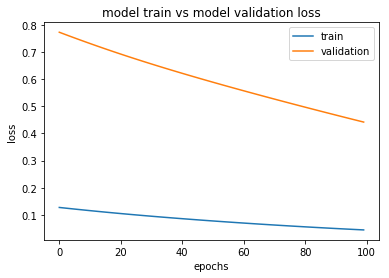

In [28]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [29]:
history = model.fit(X,y, epochs=800, validation_data=(valX,valY), shuffle=False)

Epoch 1/800
1/1 [==============================] - 0s 49ms/step - loss: 0.0435 - val_loss: 0.4393
Epoch 2/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0429 - val_loss: 0.4365
Epoch 3/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0424 - val_loss: 0.4337
Epoch 4/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0419 - val_loss: 0.4309
Epoch 5/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0414 - val_loss: 0.4281
Epoch 6/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0408 - val_loss: 0.4253
Epoch 7/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0403 - val_loss: 0.4226
Epoch 8/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0398 - val_loss: 0.4198
Epoch 9/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0393 - val_loss: 0.4170
Epoch 10/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0388 - val_loss: 0.4143
Epoch 11/800
1/1 [=

Epoch 84/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0175 - val_loss: 0.2479
Epoch 85/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0174 - val_loss: 0.2463
Epoch 86/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0173 - val_loss: 0.2447
Epoch 87/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0172 - val_loss: 0.2431
Epoch 88/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0171 - val_loss: 0.2416
Epoch 89/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0170 - val_loss: 0.2401
Epoch 90/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0169 - val_loss: 0.2386
Epoch 91/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0168 - val_loss: 0.2371
Epoch 92/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0167 - val_loss: 0.2357
Epoch 93/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0166 - val_loss: 0.2342
Epoch 94/8

1/1 [==============================] - 0s 20ms/step - loss: 0.0134 - val_loss: 0.1699
Epoch 167/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0134 - val_loss: 0.1694
Epoch 168/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0134 - val_loss: 0.1689
Epoch 169/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0134 - val_loss: 0.1683
Epoch 170/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0133 - val_loss: 0.1678
Epoch 171/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0133 - val_loss: 0.1673
Epoch 172/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0133 - val_loss: 0.1668
Epoch 173/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0132 - val_loss: 0.1663
Epoch 174/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0132 - val_loss: 0.1658
Epoch 175/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0132 - val_loss: 0.1653
Epoch 176/800


1/1 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.1332
Epoch 249/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0110 - val_loss: 0.1328
Epoch 250/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.1324
Epoch 251/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0109 - val_loss: 0.1319
Epoch 252/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0109 - val_loss: 0.1315
Epoch 253/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0109 - val_loss: 0.1311
Epoch 254/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0108 - val_loss: 0.1307
Epoch 255/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0108 - val_loss: 0.1302
Epoch 256/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0108 - val_loss: 0.1298
Epoch 257/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.1294
Epoch 258/800


1/1 [==============================] - 0s 20ms/step - loss: 0.0084 - val_loss: 0.0975
Epoch 331/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0084 - val_loss: 0.0970
Epoch 332/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0966
Epoch 333/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0962
Epoch 334/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0957
Epoch 335/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0082 - val_loss: 0.0953
Epoch 336/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0082 - val_loss: 0.0948
Epoch 337/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0082 - val_loss: 0.0944
Epoch 338/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0081 - val_loss: 0.0939
Epoch 339/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0081 - val_loss: 0.0935
Epoch 340/800


1/1 [==============================] - 0s 18ms/step - loss: 0.0056 - val_loss: 0.0608
Epoch 413/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0056 - val_loss: 0.0603
Epoch 414/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0599
Epoch 415/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0595
Epoch 416/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0590
Epoch 417/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0054 - val_loss: 0.0586
Epoch 418/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0054 - val_loss: 0.0581
Epoch 419/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0054 - val_loss: 0.0577
Epoch 420/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0053 - val_loss: 0.0573
Epoch 421/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0053 - val_loss: 0.0568
Epoch 422/800


1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - val_loss: 0.0278
Epoch 495/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - val_loss: 0.0274
Epoch 496/800
1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - val_loss: 0.0271
Epoch 497/800
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - val_loss: 0.0267
Epoch 498/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0028 - val_loss: 0.0264
Epoch 499/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0028 - val_loss: 0.0261
Epoch 500/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0027 - val_loss: 0.0257
Epoch 501/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0027 - val_loss: 0.0254
Epoch 502/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0027 - val_loss: 0.0251
Epoch 503/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0027 - val_loss: 0.0247
Epoch 504/800


1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 577/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 0.0069
Epoch 578/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 0.0068
Epoch 579/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 580/800
1/1 [==============================] - 0s 19ms/step - loss: 9.8974e-04 - val_loss: 0.0065
Epoch 581/800
1/1 [==============================] - 0s 20ms/step - loss: 9.7470e-04 - val_loss: 0.0063
Epoch 582/800
1/1 [==============================] - 0s 19ms/step - loss: 9.5982e-04 - val_loss: 0.0062
Epoch 583/800
1/1 [==============================] - 0s 20ms/step - loss: 9.4511e-04 - val_loss: 0.0061
Epoch 584/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3056e-04 - val_loss: 0.0059
Epoch 585/800
1/1 [==============================] - 0s 20ms/step - loss: 9.1618e-04 - val_los

1/1 [==============================] - 0s 18ms/step - loss: 2.7233e-04 - val_loss: 5.5315e-04
Epoch 655/800
1/1 [==============================] - 0s 20ms/step - loss: 2.6716e-04 - val_loss: 5.2507e-04
Epoch 656/800
1/1 [==============================] - 0s 19ms/step - loss: 2.6208e-04 - val_loss: 4.9792e-04
Epoch 657/800
1/1 [==============================] - 0s 19ms/step - loss: 2.5709e-04 - val_loss: 4.7170e-04
Epoch 658/800
1/1 [==============================] - 0s 19ms/step - loss: 2.5219e-04 - val_loss: 4.4638e-04
Epoch 659/800
1/1 [==============================] - 0s 20ms/step - loss: 2.4737e-04 - val_loss: 4.2197e-04
Epoch 660/800
1/1 [==============================] - 0s 20ms/step - loss: 2.4265e-04 - val_loss: 3.9842e-04
Epoch 661/800
1/1 [==============================] - 0s 19ms/step - loss: 2.3800e-04 - val_loss: 3.7574e-04
Epoch 662/800
1/1 [==============================] - 0s 20ms/step - loss: 2.3345e-04 - val_loss: 3.5390e-04
Epoch 663/800
1/1 [=======================

Epoch 730/800
1/1 [==============================] - 0s 19ms/step - loss: 6.6075e-05 - val_loss: 1.1216e-04
Epoch 731/800
1/1 [==============================] - 0s 19ms/step - loss: 6.5022e-05 - val_loss: 1.1831e-04
Epoch 732/800
1/1 [==============================] - 0s 18ms/step - loss: 6.3994e-05 - val_loss: 1.2455e-04
Epoch 733/800
1/1 [==============================] - 0s 20ms/step - loss: 6.2990e-05 - val_loss: 1.3089e-04
Epoch 734/800
1/1 [==============================] - 0s 19ms/step - loss: 6.2010e-05 - val_loss: 1.3731e-04
Epoch 735/800
1/1 [==============================] - 0s 19ms/step - loss: 6.1054e-05 - val_loss: 1.4382e-04
Epoch 736/800
1/1 [==============================] - 0s 20ms/step - loss: 6.0120e-05 - val_loss: 1.5040e-04
Epoch 737/800
1/1 [==============================] - 0s 20ms/step - loss: 5.9209e-05 - val_loss: 1.5705e-04
Epoch 738/800
1/1 [==============================] - 0s 19ms/step - loss: 5.8319e-05 - val_loss: 1.6377e-04
Epoch 739/800
1/1 [=========

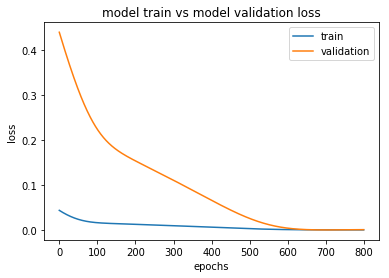

In [30]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [31]:
history = model.fit(X,y, epochs=2500, validation_data=(valX,valY), shuffle=False)

Epoch 1/2500
1/1 [==============================] - 0s 47ms/step - loss: 3.0637e-05 - val_loss: 5.8685e-04
Epoch 2/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.0467e-05 - val_loss: 5.9229e-04
Epoch 3/2500
1/1 [==============================] - 0s 18ms/step - loss: 3.0301e-05 - val_loss: 5.9766e-04
Epoch 4/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.0140e-05 - val_loss: 6.0298e-04
Epoch 5/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.9983e-05 - val_loss: 6.0823e-04
Epoch 6/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.9830e-05 - val_loss: 6.1344e-04
Epoch 7/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9681e-05 - val_loss: 6.1857e-04
Epoch 8/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9536e-05 - val_loss: 6.2365e-04
Epoch 9/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9395e-05 - val_loss: 6.2868e-04
Epoch 10/2500
1/1 [==================

Epoch 77/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.4917e-05 - val_loss: 8.4111e-04
Epoch 78/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4890e-05 - val_loss: 8.4263e-04
Epoch 79/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.4864e-05 - val_loss: 8.4411e-04
Epoch 80/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4838e-05 - val_loss: 8.4556e-04
Epoch 81/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.4812e-05 - val_loss: 8.4697e-04
Epoch 82/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4787e-05 - val_loss: 8.4835e-04
Epoch 83/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4763e-05 - val_loss: 8.4968e-04
Epoch 84/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4738e-05 - val_loss: 8.5099e-04
Epoch 85/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.4715e-05 - val_loss: 8.5226e-04
Epoch 86/2500
1/1 [=========

1/1 [==============================] - 0s 19ms/step - loss: 2.3622e-05 - val_loss: 8.7883e-04
Epoch 153/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3609e-05 - val_loss: 8.7859e-04
Epoch 154/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3597e-05 - val_loss: 8.7834e-04
Epoch 155/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3584e-05 - val_loss: 8.7808e-04
Epoch 156/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3571e-05 - val_loss: 8.7781e-04
Epoch 157/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3559e-05 - val_loss: 8.7752e-04
Epoch 158/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3546e-05 - val_loss: 8.7722e-04
Epoch 159/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3534e-05 - val_loss: 8.7691e-04
Epoch 160/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.3521e-05 - val_loss: 8.7659e-04
Epoch 161/2500
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 2.2719e-05 - val_loss: 8.3638e-04
Epoch 228/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2707e-05 - val_loss: 8.3559e-04
Epoch 229/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2695e-05 - val_loss: 8.3480e-04
Epoch 230/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.2684e-05 - val_loss: 8.3400e-04
Epoch 231/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.2672e-05 - val_loss: 8.3320e-04
Epoch 232/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2660e-05 - val_loss: 8.3240e-04
Epoch 233/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2649e-05 - val_loss: 8.3159e-04
Epoch 234/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2637e-05 - val_loss: 8.3079e-04
Epoch 235/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.2625e-05 - val_loss: 8.2998e-04
Epoch 236/2500
1/1 [==============

1/1 [==============================] - 0s 24ms/step - loss: 2.1834e-05 - val_loss: 7.7090e-04
Epoch 303/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.1822e-05 - val_loss: 7.6998e-04
Epoch 304/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1811e-05 - val_loss: 7.6905e-04
Epoch 305/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1799e-05 - val_loss: 7.6812e-04
Epoch 306/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1787e-05 - val_loss: 7.6720e-04
Epoch 307/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1775e-05 - val_loss: 7.6627e-04
Epoch 308/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1763e-05 - val_loss: 7.6534e-04
Epoch 309/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1751e-05 - val_loss: 7.6441e-04
Epoch 310/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.1740e-05 - val_loss: 7.6348e-04
Epoch 311/2500
1/1 [==============

1/1 [==============================] - 0s 27ms/step - loss: 2.0942e-05 - val_loss: 7.0049e-04
Epoch 378/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0930e-05 - val_loss: 6.9955e-04
Epoch 379/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0918e-05 - val_loss: 6.9861e-04
Epoch 380/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0906e-05 - val_loss: 6.9767e-04
Epoch 381/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0894e-05 - val_loss: 6.9672e-04
Epoch 382/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.0882e-05 - val_loss: 6.9578e-04
Epoch 383/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0870e-05 - val_loss: 6.9484e-04
Epoch 384/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.0858e-05 - val_loss: 6.9390e-04
Epoch 385/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0846e-05 - val_loss: 6.9296e-04
Epoch 386/2500
1/1 [==============

1/1 [==============================] - 0s 20ms/step - loss: 2.0044e-05 - val_loss: 6.3025e-04
Epoch 453/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0032e-05 - val_loss: 6.2933e-04
Epoch 454/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.0020e-05 - val_loss: 6.2840e-04
Epoch 455/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.0008e-05 - val_loss: 6.2747e-04
Epoch 456/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9996e-05 - val_loss: 6.2655e-04
Epoch 457/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9984e-05 - val_loss: 6.2562e-04
Epoch 458/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9972e-05 - val_loss: 6.2470e-04
Epoch 459/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9960e-05 - val_loss: 6.2377e-04
Epoch 460/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.9948e-05 - val_loss: 6.2285e-04
Epoch 461/2500
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 1.9142e-05 - val_loss: 5.6171e-04
Epoch 528/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9130e-05 - val_loss: 5.6081e-04
Epoch 529/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9118e-05 - val_loss: 5.5991e-04
Epoch 530/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9106e-05 - val_loss: 5.5902e-04
Epoch 531/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9094e-05 - val_loss: 5.5812e-04
Epoch 532/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9082e-05 - val_loss: 5.5722e-04
Epoch 533/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9070e-05 - val_loss: 5.5633e-04
Epoch 534/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9058e-05 - val_loss: 5.5543e-04
Epoch 535/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9046e-05 - val_loss: 5.5453e-04
Epoch 536/2500
1/1 [==============

1/1 [==============================] - 0s 22ms/step - loss: 1.8241e-05 - val_loss: 4.9556e-04
Epoch 603/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.8229e-05 - val_loss: 4.9469e-04
Epoch 604/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.8217e-05 - val_loss: 4.9383e-04
Epoch 605/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.8205e-05 - val_loss: 4.9297e-04
Epoch 606/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.8193e-05 - val_loss: 4.9211e-04
Epoch 607/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.8181e-05 - val_loss: 4.9125e-04
Epoch 608/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.8168e-05 - val_loss: 4.9038e-04
Epoch 609/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.8157e-05 - val_loss: 4.8953e-04
Epoch 610/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.8144e-05 - val_loss: 4.8867e-04
Epoch 611/2500
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 1.7341e-05 - val_loss: 4.3230e-04
Epoch 678/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7330e-05 - val_loss: 4.3148e-04
Epoch 679/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7317e-05 - val_loss: 4.3066e-04
Epoch 680/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7306e-05 - val_loss: 4.2984e-04
Epoch 681/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7294e-05 - val_loss: 4.2902e-04
Epoch 682/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7282e-05 - val_loss: 4.2820e-04
Epoch 683/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.7270e-05 - val_loss: 4.2738e-04
Epoch 684/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7258e-05 - val_loss: 4.2656e-04
Epoch 685/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.7246e-05 - val_loss: 4.2575e-04
Epoch 686/2500
1/1 [==============

1/1 [==============================] - 0s 19ms/step - loss: 1.6447e-05 - val_loss: 3.7240e-04
Epoch 753/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6435e-05 - val_loss: 3.7162e-04
Epoch 754/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6424e-05 - val_loss: 3.7085e-04
Epoch 755/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6412e-05 - val_loss: 3.7007e-04
Epoch 756/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.6400e-05 - val_loss: 3.6930e-04
Epoch 757/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6388e-05 - val_loss: 3.6853e-04
Epoch 758/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.6376e-05 - val_loss: 3.6776e-04
Epoch 759/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6364e-05 - val_loss: 3.6699e-04
Epoch 760/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6352e-05 - val_loss: 3.6622e-04
Epoch 761/2500
1/1 [==============

1/1 [==============================] - 0s 22ms/step - loss: 1.5561e-05 - val_loss: 3.1630e-04
Epoch 828/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.5549e-05 - val_loss: 3.1558e-04
Epoch 829/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.5538e-05 - val_loss: 3.1486e-04
Epoch 830/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.5526e-05 - val_loss: 3.1414e-04
Epoch 831/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.5514e-05 - val_loss: 3.1342e-04
Epoch 832/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.5502e-05 - val_loss: 3.1270e-04
Epoch 833/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.5491e-05 - val_loss: 3.1199e-04
Epoch 834/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.5479e-05 - val_loss: 3.1127e-04
Epoch 835/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.5467e-05 - val_loss: 3.1056e-04
Epoch 836/2500
1/1 [==============

1/1 [==============================] - 0s 20ms/step - loss: 1.4685e-05 - val_loss: 2.6443e-04
Epoch 903/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4674e-05 - val_loss: 2.6377e-04
Epoch 904/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4662e-05 - val_loss: 2.6311e-04
Epoch 905/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4651e-05 - val_loss: 2.6245e-04
Epoch 906/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4639e-05 - val_loss: 2.6179e-04
Epoch 907/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4627e-05 - val_loss: 2.6113e-04
Epoch 908/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4616e-05 - val_loss: 2.6048e-04
Epoch 909/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4604e-05 - val_loss: 2.5982e-04
Epoch 910/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4593e-05 - val_loss: 2.5916e-04
Epoch 911/2500
1/1 [==============

1/1 [==============================] - 0s 20ms/step - loss: 1.3822e-05 - val_loss: 2.1722e-04
Epoch 978/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3811e-05 - val_loss: 2.1662e-04
Epoch 979/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3799e-05 - val_loss: 2.1603e-04
Epoch 980/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3788e-05 - val_loss: 2.1543e-04
Epoch 981/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3777e-05 - val_loss: 2.1483e-04
Epoch 982/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3765e-05 - val_loss: 2.1424e-04
Epoch 983/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3754e-05 - val_loss: 2.1365e-04
Epoch 984/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3742e-05 - val_loss: 2.1306e-04
Epoch 985/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.3731e-05 - val_loss: 2.1247e-04
Epoch 986/2500
1/1 [==============

Epoch 1052/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2974e-05 - val_loss: 1.7502e-04
Epoch 1053/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2963e-05 - val_loss: 1.7449e-04
Epoch 1054/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2952e-05 - val_loss: 1.7397e-04
Epoch 1055/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2941e-05 - val_loss: 1.7344e-04
Epoch 1056/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2929e-05 - val_loss: 1.7292e-04
Epoch 1057/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2918e-05 - val_loss: 1.7239e-04
Epoch 1058/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2907e-05 - val_loss: 1.7187e-04
Epoch 1059/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2896e-05 - val_loss: 1.7135e-04
Epoch 1060/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2885e-05 - val_loss: 1.7083e-04
Epoch 1061

1/1 [==============================] - 0s 20ms/step - loss: 1.2154e-05 - val_loss: 1.3866e-04
Epoch 1127/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2143e-05 - val_loss: 1.3821e-04
Epoch 1128/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2133e-05 - val_loss: 1.3776e-04
Epoch 1129/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2122e-05 - val_loss: 1.3730e-04
Epoch 1130/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2111e-05 - val_loss: 1.3685e-04
Epoch 1131/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2100e-05 - val_loss: 1.3640e-04
Epoch 1132/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2089e-05 - val_loss: 1.3595e-04
Epoch 1133/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.2078e-05 - val_loss: 1.3551e-04
Epoch 1134/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.2067e-05 - val_loss: 1.3506e-04
Epoch 1135/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 1.1354e-05 - val_loss: 1.0786e-04
Epoch 1201/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.1343e-05 - val_loss: 1.0748e-04
Epoch 1202/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.1332e-05 - val_loss: 1.0711e-04
Epoch 1203/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.1322e-05 - val_loss: 1.0673e-04
Epoch 1204/2500
1/1 [==============================] - 0s 24ms/step - loss: 1.1311e-05 - val_loss: 1.0636e-04
Epoch 1205/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.1300e-05 - val_loss: 1.0598e-04
Epoch 1206/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.1290e-05 - val_loss: 1.0561e-04
Epoch 1207/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.1279e-05 - val_loss: 1.0524e-04
Epoch 1208/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.1268e-05 - val_loss: 1.0487e-04
Epoch 1209/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 1.0574e-05 - val_loss: 8.2882e-05
Epoch 1275/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0564e-05 - val_loss: 8.2586e-05
Epoch 1276/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.0553e-05 - val_loss: 8.2290e-05
Epoch 1277/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0543e-05 - val_loss: 8.1996e-05
Epoch 1278/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0533e-05 - val_loss: 8.1703e-05
Epoch 1279/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0522e-05 - val_loss: 8.1411e-05
Epoch 1280/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0512e-05 - val_loss: 8.1119e-05
Epoch 1281/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.0501e-05 - val_loss: 8.0831e-05
Epoch 1282/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.0491e-05 - val_loss: 8.0541e-05
Epoch 1283/2500
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 9.8173e-06 - val_loss: 6.3975e-05
Epoch 1349/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.8072e-06 - val_loss: 6.3761e-05
Epoch 1350/2500
1/1 [==============================] - 0s 19ms/step - loss: 9.7971e-06 - val_loss: 6.3549e-05
Epoch 1351/2500
1/1 [==============================] - 0s 21ms/step - loss: 9.7870e-06 - val_loss: 6.3339e-05
Epoch 1352/2500
1/1 [==============================] - 0s 19ms/step - loss: 9.7770e-06 - val_loss: 6.3129e-05
Epoch 1353/2500
1/1 [==============================] - 0s 21ms/step - loss: 9.7671e-06 - val_loss: 6.2922e-05
Epoch 1354/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.7569e-06 - val_loss: 6.2714e-05
Epoch 1355/2500
1/1 [==============================] - 0s 21ms/step - loss: 9.7469e-06 - val_loss: 6.2507e-05
Epoch 1356/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.7368e-06 - val_loss: 6.2302e-05
Epoch 1357/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 9.0851e-06 - val_loss: 5.1325e-05
Epoch 1423/2500
1/1 [==============================] - 0s 19ms/step - loss: 9.0754e-06 - val_loss: 5.1197e-05
Epoch 1424/2500
1/1 [==============================] - 0s 19ms/step - loss: 9.0655e-06 - val_loss: 5.1070e-05
Epoch 1425/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.0560e-06 - val_loss: 5.0946e-05
Epoch 1426/2500
1/1 [==============================] - 0s 21ms/step - loss: 9.0463e-06 - val_loss: 5.0822e-05
Epoch 1427/2500
1/1 [==============================] - 0s 19ms/step - loss: 9.0366e-06 - val_loss: 5.0699e-05
Epoch 1428/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.0269e-06 - val_loss: 5.0577e-05
Epoch 1429/2500
1/1 [==============================] - 0s 18ms/step - loss: 9.0172e-06 - val_loss: 5.0457e-05
Epoch 1430/2500
1/1 [==============================] - 0s 20ms/step - loss: 9.0075e-06 - val_loss: 5.0338e-05
Epoch 1431/2500
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 8.3792e-06 - val_loss: 4.5075e-05
Epoch 1497/2500
1/1 [==============================] - 0s 19ms/step - loss: 8.3699e-06 - val_loss: 4.5035e-05
Epoch 1498/2500
1/1 [==============================] - 0s 20ms/step - loss: 8.3606e-06 - val_loss: 4.4996e-05
Epoch 1499/2500
1/1 [==============================] - 0s 21ms/step - loss: 8.3512e-06 - val_loss: 4.4958e-05
Epoch 1500/2500
1/1 [==============================] - 0s 21ms/step - loss: 8.3418e-06 - val_loss: 4.4922e-05
Epoch 1501/2500
1/1 [==============================] - 0s 20ms/step - loss: 8.3326e-06 - val_loss: 4.4886e-05
Epoch 1502/2500
1/1 [==============================] - 0s 21ms/step - loss: 8.3233e-06 - val_loss: 4.4852e-05
Epoch 1503/2500
1/1 [==============================] - 0s 22ms/step - loss: 8.3138e-06 - val_loss: 4.4819e-05
Epoch 1504/2500
1/1 [==============================] - 0s 21ms/step - loss: 8.3046e-06 - val_loss: 4.4787e-05
Epoch 1505/2500
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 7.7013e-06 - val_loss: 4.5319e-05
Epoch 1571/2500
1/1 [==============================] - 0s 24ms/step - loss: 7.6924e-06 - val_loss: 4.5368e-05
Epoch 1572/2500
1/1 [==============================] - 0s 19ms/step - loss: 7.6834e-06 - val_loss: 4.5417e-05
Epoch 1573/2500
1/1 [==============================] - 0s 19ms/step - loss: 7.6744e-06 - val_loss: 4.5467e-05
Epoch 1574/2500
1/1 [==============================] - 0s 20ms/step - loss: 7.6654e-06 - val_loss: 4.5518e-05
Epoch 1575/2500
1/1 [==============================] - 0s 19ms/step - loss: 7.6564e-06 - val_loss: 4.5571e-05
Epoch 1576/2500
1/1 [==============================] - 0s 19ms/step - loss: 7.6476e-06 - val_loss: 4.5625e-05
Epoch 1577/2500
1/1 [==============================] - 0s 20ms/step - loss: 7.6386e-06 - val_loss: 4.5680e-05
Epoch 1578/2500
1/1 [==============================] - 0s 18ms/step - loss: 7.6297e-06 - val_loss: 4.5736e-05
Epoch 1579/2500
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 7.0525e-06 - val_loss: 5.2089e-05
Epoch 1645/2500
1/1 [==============================] - 0s 19ms/step - loss: 7.0440e-06 - val_loss: 5.2225e-05
Epoch 1646/2500
1/1 [==============================] - 0s 20ms/step - loss: 7.0354e-06 - val_loss: 5.2363e-05
Epoch 1647/2500
1/1 [==============================] - 0s 26ms/step - loss: 7.0268e-06 - val_loss: 5.2501e-05
Epoch 1648/2500
1/1 [==============================] - 0s 21ms/step - loss: 7.0183e-06 - val_loss: 5.2641e-05
Epoch 1649/2500
1/1 [==============================] - 0s 21ms/step - loss: 7.0098e-06 - val_loss: 5.2781e-05
Epoch 1650/2500
1/1 [==============================] - 0s 20ms/step - loss: 7.0013e-06 - val_loss: 5.2924e-05
Epoch 1651/2500
1/1 [==============================] - 0s 20ms/step - loss: 6.9927e-06 - val_loss: 5.3067e-05
Epoch 1652/2500
1/1 [==============================] - 0s 21ms/step - loss: 6.9842e-06 - val_loss: 5.3211e-05
Epoch 1653/2500
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 6.4342e-06 - val_loss: 6.5360e-05
Epoch 1719/2500
1/1 [==============================] - 0s 20ms/step - loss: 6.4260e-06 - val_loss: 6.5583e-05
Epoch 1720/2500
1/1 [==============================] - 0s 19ms/step - loss: 6.4178e-06 - val_loss: 6.5807e-05
Epoch 1721/2500
1/1 [==============================] - 0s 20ms/step - loss: 6.4098e-06 - val_loss: 6.6034e-05
Epoch 1722/2500
1/1 [==============================] - 0s 19ms/step - loss: 6.4017e-06 - val_loss: 6.6261e-05
Epoch 1723/2500
1/1 [==============================] - 0s 18ms/step - loss: 6.3936e-06 - val_loss: 6.6490e-05
Epoch 1724/2500
1/1 [==============================] - 0s 20ms/step - loss: 6.3854e-06 - val_loss: 6.6718e-05
Epoch 1725/2500
1/1 [==============================] - 0s 18ms/step - loss: 6.3773e-06 - val_loss: 6.6949e-05
Epoch 1726/2500
1/1 [==============================] - 0s 19ms/step - loss: 6.3692e-06 - val_loss: 6.7181e-05
Epoch 1727/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 5.8474e-06 - val_loss: 8.5039e-05
Epoch 1793/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.8397e-06 - val_loss: 8.5348e-05
Epoch 1794/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.8319e-06 - val_loss: 8.5658e-05
Epoch 1795/2500
1/1 [==============================] - 0s 20ms/step - loss: 5.8242e-06 - val_loss: 8.5970e-05
Epoch 1796/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.8166e-06 - val_loss: 8.6282e-05
Epoch 1797/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.8089e-06 - val_loss: 8.6596e-05
Epoch 1798/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.8012e-06 - val_loss: 8.6911e-05
Epoch 1799/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.7935e-06 - val_loss: 8.7226e-05
Epoch 1800/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.7859e-06 - val_loss: 8.7544e-05
Epoch 1801/2500
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 5.2930e-06 - val_loss: 1.1097e-04
Epoch 1867/2500
1/1 [==============================] - 0s 20ms/step - loss: 5.2857e-06 - val_loss: 1.1137e-04
Epoch 1868/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.2784e-06 - val_loss: 1.1176e-04
Epoch 1869/2500
1/1 [==============================] - 0s 20ms/step - loss: 5.2712e-06 - val_loss: 1.1215e-04
Epoch 1870/2500
1/1 [==============================] - 0s 20ms/step - loss: 5.2639e-06 - val_loss: 1.1255e-04
Epoch 1871/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.2567e-06 - val_loss: 1.1295e-04
Epoch 1872/2500
1/1 [==============================] - 0s 19ms/step - loss: 5.2494e-06 - val_loss: 1.1334e-04
Epoch 1873/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.2422e-06 - val_loss: 1.1374e-04
Epoch 1874/2500
1/1 [==============================] - 0s 18ms/step - loss: 5.2350e-06 - val_loss: 1.1414e-04
Epoch 1875/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 4.7716e-06 - val_loss: 1.4294e-04
Epoch 1941/2500
1/1 [==============================] - 0s 24ms/step - loss: 4.7647e-06 - val_loss: 1.4341e-04
Epoch 1942/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.7579e-06 - val_loss: 1.4388e-04
Epoch 1943/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.7511e-06 - val_loss: 1.4436e-04
Epoch 1944/2500
1/1 [==============================] - 0s 18ms/step - loss: 4.7443e-06 - val_loss: 1.4483e-04
Epoch 1945/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.7376e-06 - val_loss: 1.4531e-04
Epoch 1946/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.7307e-06 - val_loss: 1.4579e-04
Epoch 1947/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.7240e-06 - val_loss: 1.4627e-04
Epoch 1948/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.7172e-06 - val_loss: 1.4675e-04
Epoch 1949/2500
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 4.2837e-06 - val_loss: 1.8065e-04
Epoch 2015/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.2773e-06 - val_loss: 1.8120e-04
Epoch 2016/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.2710e-06 - val_loss: 1.8175e-04
Epoch 2017/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.2646e-06 - val_loss: 1.8230e-04
Epoch 2018/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.2582e-06 - val_loss: 1.8285e-04
Epoch 2019/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.2519e-06 - val_loss: 1.8340e-04
Epoch 2020/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.2456e-06 - val_loss: 1.8396e-04
Epoch 2021/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.2393e-06 - val_loss: 1.8451e-04
Epoch 2022/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.2329e-06 - val_loss: 1.8506e-04
Epoch 2023/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 3.8296e-06 - val_loss: 2.2377e-04
Epoch 2089/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.8236e-06 - val_loss: 2.2439e-04
Epoch 2090/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.8178e-06 - val_loss: 2.2501e-04
Epoch 2091/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.8119e-06 - val_loss: 2.2563e-04
Epoch 2092/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.8060e-06 - val_loss: 2.2625e-04
Epoch 2093/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.8001e-06 - val_loss: 2.2687e-04
Epoch 2094/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.7942e-06 - val_loss: 2.2749e-04
Epoch 2095/2500
1/1 [==============================] - 0s 19ms/step - loss: 3.7883e-06 - val_loss: 2.2811e-04
Epoch 2096/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.7825e-06 - val_loss: 2.2874e-04
Epoch 2097/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 3.4092e-06 - val_loss: 2.7186e-04
Epoch 2163/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.4038e-06 - val_loss: 2.7254e-04
Epoch 2164/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.3983e-06 - val_loss: 2.7323e-04
Epoch 2165/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.3928e-06 - val_loss: 2.7391e-04
Epoch 2166/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.3874e-06 - val_loss: 2.7459e-04
Epoch 2167/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.3820e-06 - val_loss: 2.7528e-04
Epoch 2168/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.3767e-06 - val_loss: 2.7597e-04
Epoch 2169/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.3712e-06 - val_loss: 2.7665e-04
Epoch 2170/2500
1/1 [==============================] - 0s 18ms/step - loss: 3.3658e-06 - val_loss: 2.7734e-04
Epoch 2171/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 3.0224e-06 - val_loss: 3.2448e-04
Epoch 2237/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.0174e-06 - val_loss: 3.2521e-04
Epoch 2238/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.0124e-06 - val_loss: 3.2595e-04
Epoch 2239/2500
1/1 [==============================] - 0s 19ms/step - loss: 3.0074e-06 - val_loss: 3.2669e-04
Epoch 2240/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.0024e-06 - val_loss: 3.2744e-04
Epoch 2241/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.9975e-06 - val_loss: 3.2818e-04
Epoch 2242/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9925e-06 - val_loss: 3.2892e-04
Epoch 2243/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9875e-06 - val_loss: 3.2966e-04
Epoch 2244/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.9826e-06 - val_loss: 3.3041e-04
Epoch 2245/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 2.6686e-06 - val_loss: 3.8106e-04
Epoch 2311/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6640e-06 - val_loss: 3.8186e-04
Epoch 2312/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6595e-06 - val_loss: 3.8265e-04
Epoch 2313/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6549e-06 - val_loss: 3.8344e-04
Epoch 2314/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6504e-06 - val_loss: 3.8423e-04
Epoch 2315/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6458e-06 - val_loss: 3.8502e-04
Epoch 2316/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6413e-06 - val_loss: 3.8582e-04
Epoch 2317/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6368e-06 - val_loss: 3.8661e-04
Epoch 2318/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6323e-06 - val_loss: 3.8740e-04
Epoch 2319/2500
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 2.3472e-06 - val_loss: 4.4107e-04
Epoch 2385/2500
1/1 [==============================] - 0s 23ms/step - loss: 2.3431e-06 - val_loss: 4.4190e-04
Epoch 2386/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.3389e-06 - val_loss: 4.4273e-04
Epoch 2387/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3348e-06 - val_loss: 4.4356e-04
Epoch 2388/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3307e-06 - val_loss: 4.4440e-04
Epoch 2389/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3266e-06 - val_loss: 4.4523e-04
Epoch 2390/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3225e-06 - val_loss: 4.4607e-04
Epoch 2391/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3184e-06 - val_loss: 4.4690e-04
Epoch 2392/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3143e-06 - val_loss: 4.4774e-04
Epoch 2393/2500
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 2.0571e-06 - val_loss: 5.0389e-04
Epoch 2459/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0534e-06 - val_loss: 5.0475e-04
Epoch 2460/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0497e-06 - val_loss: 5.0562e-04
Epoch 2461/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0460e-06 - val_loss: 5.0649e-04
Epoch 2462/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0423e-06 - val_loss: 5.0735e-04
Epoch 2463/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0386e-06 - val_loss: 5.0822e-04
Epoch 2464/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0349e-06 - val_loss: 5.0909e-04
Epoch 2465/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0312e-06 - val_loss: 5.0996e-04
Epoch 2466/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0276e-06 - val_loss: 5.1082e-04
Epoch 2467/2500
1/1 [=====

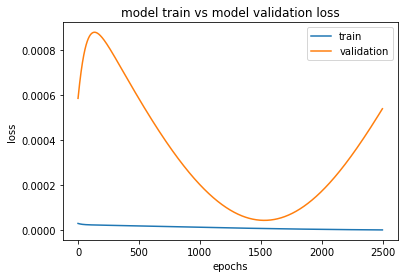

In [32]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# 7- LSTM Model for Time Series Forecasting: Part 1

In [49]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [50]:
df = pd.read_csv('air_pollution.csv')
df

,date,pollution_today,dew
0,1/2/2010,145.958333,-8.500000
1,1/3/2010,78.833333,-10.125000
2,1/4/2010,31.333333,-20.875000
3,1/5/2010,42.458333,-24.583333
4,1/6/2010,56.416667,-23.708333
...,...,...,...
1820,12/27/2014,238.666667,-9.666667
1821,12/28/2014,197.375000,-10.791667
1822,12/29/2014,159.000000,-12.333333
1823,12/30/2014,46.083333,-13.916667


In [51]:
train_dates = pd.to_datetime(df['date'])
train_dates

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
1820   2014-12-27
1821   2014-12-28
1822   2014-12-29
1823   2014-12-30
1824   2014-12-31
Name: date, Length: 1825, dtype: datetime64[ns]

In [52]:
cols = list(df)[1:3]
cols

['pollution_today', 'dew']

In [53]:
df_for_training = df[cols].astype(float)

df_for_training

,pollution_today,dew
0,145.958333,-8.500000
1,78.833333,-10.125000
2,31.333333,-20.875000
3,42.458333,-24.583333
4,56.416667,-23.708333
...,...,...
1820,238.666667,-9.666667
1821,197.375000,-10.791667
1822,159.000000,-12.333333
1823,46.083333,-13.916667


<Axes: >

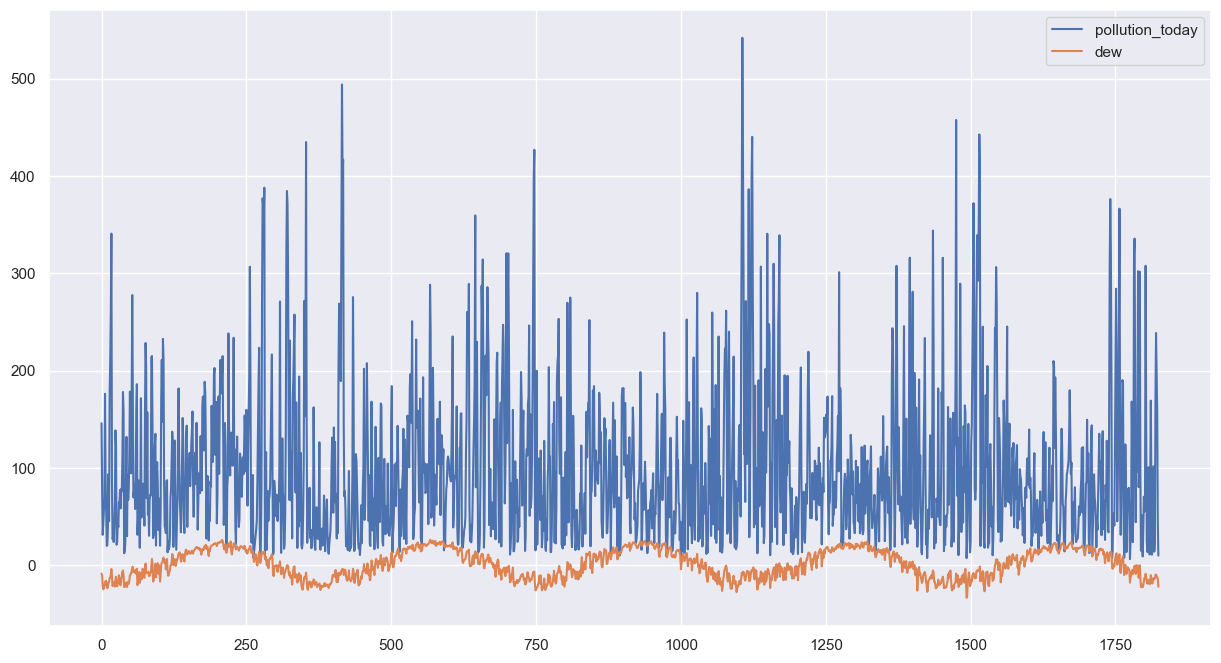

In [54]:
df_for_plot=df_for_training
df_for_plot.plot.line(figsize=(15,8))

In [55]:
scaler=StandardScaler()
scaler =scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


df_for_training_scaled

array([[ 0.62137433, -0.72943417],
       [-0.25280106, -0.84419708],
       [-0.87139816, -1.60339785],
       ...,
       [ 0.79121722, -1.00015693],
       [-0.67930748, -1.1119772 ],
       [-1.1486816 , -1.66813591]])

In [56]:
trainX=[]
trainY=[]


# numero di giorni che vogliamo guardare nel futuro basandosi sui giorni passati
n_future = 1
# giorni del passato
n_past = 25

# X deve essere TRIdimensionale
# y deve essere BIdimensionale

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    # Come Y di oggi usa il valore di domani
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
trainX, trainY =np.array(trainX), np.array(trainY)

print('trainX shape==={}.'.format(trainX.shape))
print('trainY shape==={}.'.format(trainY.shape))

trainX shape===(1800, 25, 2).
trainY shape===(1800, 1).


In [57]:
model = Sequential()

# model.add(LSTM(32, activation='relu',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Bidirectional(LSTM(32,return_sequences=True),input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 25, 64)            8960      
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 25, 64)            0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33857 (132.25 KB)
Trainable params: 3385

In [58]:
history= model.fit(trainX,trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)
#history= model.fit(trainX,trainY, epochs=500, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/500
102/102 [==============================] - 8s 25ms/step - loss: 0.9275 - val_loss: 0.9169
Epoch 2/500
102/102 [==============================] - 1s 12ms/step - loss: 0.8336 - val_loss: 0.8475
Epoch 3/500
102/102 [==============================] - 1s 12ms/step - loss: 0.7755 - val_loss: 0.8130
Epoch 4/500
102/102 [==============================] - 1s 13ms/step - loss: 0.7499 - val_loss: 0.7800
Epoch 5/500
102/102 [==============================] - 1s 13ms/step - loss: 0.7107 - val_loss: 0.8434
Epoch 6/500
102/102 [==============================] - 1s 13ms/step - loss: 0.7014 - val_loss: 0.7303
Epoch 7/500
102/102 [==============================] - 1s 13ms/step - loss: 0.7023 - val_loss: 0.7183
Epoch 8/500
102/102 [==============================] - 1s 13ms/step - loss: 0.6835 - val_loss: 0.6991
Epoch 9/500
102/102 [==============================] - 1s 13ms/step - loss: 0.6974 - val_loss: 0.6865
Epoch 10/500
102/102 [==============================] - 1s 14ms/step - loss: 0.686

KeyboardInterrupt: 

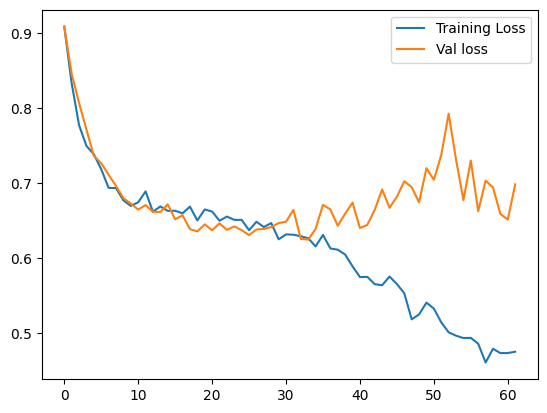

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

# 8- LSTM Model for Time Series Forecasting: Part 2

In [39]:
from pandas.tseries.holiday import USFederalHolidayCalendar

from pandas.tseries.offsets import CustomBusinessDay

In [40]:
us_bd=CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [41]:
n_past = 10
n_days_for_prediction=100
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [42]:
prediction = model.predict(trainX[-n_days_for_prediction:])

4/4 [==============================] - 1s 5ms/step


In [43]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [44]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'pollution_today':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

C:\Users\giord\AppData\Local\Temp\ipykernel_1432\2110384924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


<Axes: xlabel='date', ylabel='pollution_today'>

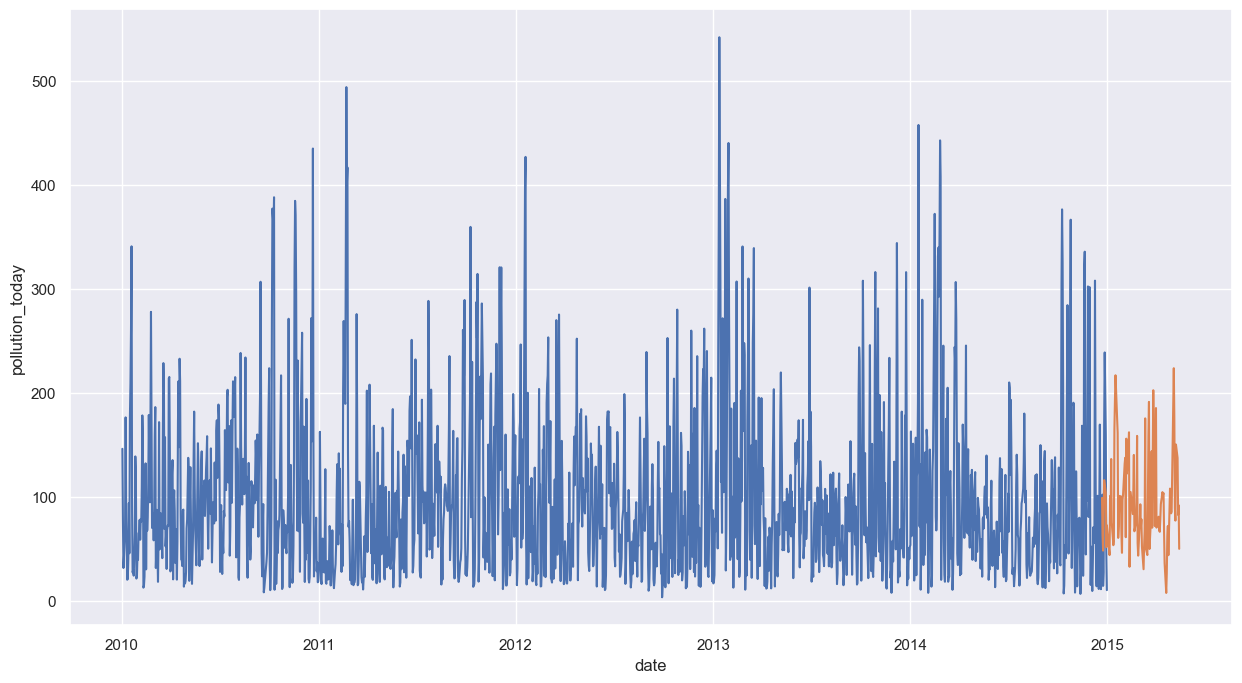

In [48]:
original = df[['date', 'pollution_today']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2010-1-1']

sns.set_theme(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=original, x="date", y="pollution_today")
sns.lineplot(data=df_forecast, x="date", y="pollution_today")

# 9- Featue Understanding in LSTM

# 9- BiLSTM Model for Time Series Forcasting

# 10- Performance Comparison for LSTM and Bi-LSTM 